<a href="https://www.kaggle.com/code/gulnuruzun/supervised-unsupervisedlearningsmokingdrinkingdata?scriptVersionId=197208280" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **1. Downloading the Dataset**

The project uses the "Smoking and Drinking Dataset with Body Signal" dataset. This dataset is collected from the National Health Insurance Service in Korea. All personal information and sensitive data have been excluded. The purpose of this dataset is to:

* Analyze body signals

* Classify individuals as smokers or drinkers.

The dataset is 29 MB in size and contains 991,346 observations and 24 features.

In [1]:
# Data Manipulation and Preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# Modeling - Machine Learning Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

# Clustering Algorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore for warnings
import warnings

### Explain the Libraries

1. Data Manipulation and Preprocessing

numpy: NumPy is a fundamental package for numerical computations in Python. It provides support for arrays and matrices, along with a large collection of mathematical functions to operate on these arrays efficiently.

pandas: Pandas is a data manipulation and analysis library. It provides data structures like DataFrames, which allow for efficient manipulation of large datasets, including handling missing data, filtering, and grouping.

train_test_split (from sklearn.model_selection): Splits the dataset into training and testing sets. It helps to evaluate model performance by training on one subset and testing on another.

cross_val_score (from sklearn.model_selection): Performs cross-validation, which splits the dataset into multiple parts and uses different subsets for training and testing, ensuring the model generalizes well.

LabelEncoder (from sklearn.preprocessing): Converts categorical labels (like strings) into numerical values, which are easier to work with for machine learning algorithms.

StandardScaler (from sklearn.preprocessing): Standardizes features by removing the mean and scaling them to unit variance. It’s useful when features have different scales and you want to normalize them.

MinMaxScaler (from sklearn.preprocessing): Transforms features by scaling each feature to a given range, often between 0 and 1. This is used when features need to be normalized but not standardized.

2. Modeling - Machine Learning Models

LinearRegression (from sklearn.linear_model): A simple linear approach to modeling the relationship between a dependent variable and one or more independent variables. It fits a linear equation to observed data.

LogisticRegression (from sklearn.linear_model): Used for binary classification problems. It models the probability of a categorical dependent variable using a logistic function.

DecisionTreeClassifier (from sklearn.tree): A tree-based classifier that splits the dataset into branches based on feature values. It's used for both classification and regression tasks.

KNeighborsClassifier (from sklearn.neighbors): Implements the k-nearest neighbors algorithm, a simple and intuitive classifier that classifies a data point based on the majority label of its k-nearest neighbors.

3. Clustering Algorithms

KMeans (from sklearn.cluster): A clustering algorithm that partitions the dataset into K distinct clusters, aiming to minimize the variance within each cluster.
AgglomerativeClustering (from sklearn.cluster): A hierarchical clustering method that builds clusters by merging or splitting them based on a predefined linkage criterion.

DBSCAN (from sklearn.cluster): A density-based clustering algorithm that finds core samples of high density and expands clusters from them. It’s useful for datasets with noise and clusters of varying density.

GaussianMixture (from sklearn.mixture): A probabilistic model that assumes all data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.

sch (from scipy.cluster.hierarchy): Provides hierarchical clustering routines, such as dendrograms, to visualize how clusters are formed in a hierarchical manner.

4. Dimensionality Reduction

PCA (from sklearn.decomposition): Principal Component Analysis is a technique used to reduce the dimensionality of large datasets by transforming the original variables into a smaller number of uncorrelated variables (principal components), while retaining most of the variation in the data.

5. Evaluation Metrics

accuracy_score (from sklearn.metrics): Measures the accuracy of a classification model by comparing the number of correctly predicted labels to the total number of labels.

classification_report (from sklearn.metrics): Generates a report that includes precision, recall, and F1-score for each class in a classification model.

confusion_matrix (from sklearn.metrics): A matrix used to evaluate the performance of a classification algorithm by comparing predicted and actual labels.

mean_squared_error (from sklearn.metrics): Measures the average of the squares of the errors between predicted and actual values in a regression model.
r2_score (from sklearn.metrics): Represents the proportion of variance explained by the model. It indicates how well the regression predictions fit the real data.

silhouette_score (from sklearn.metrics): A metric used to evaluate the quality of clustering. It measures how similar a data point is to its own cluster compared to other clusters.

davies_bouldin_score (from sklearn.metrics): Another clustering evaluation metric that measures the average similarity ratio of each cluster with the cluster most similar to it.

calinski_harabasz_score (from sklearn.metrics): Also called the Variance Ratio Criterion, this score evaluates the dispersion of clusters. A higher score indicates better-defined clusters.

6. Visualization Libraries

matplotlib.pyplot: A comprehensive library for creating static, animated, and interactive visualizations in Python. It is widely used for plotting graphs and charts.

seaborn: Built on top of matplotlib, Seaborn provides a high-level interface for creating visually appealing and informative statistical plots, such as heatmaps, bar charts, and pair plots.

In [2]:
# Ignore warnings
warnings.filterwarnings('ignore')

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smoking-drinking-dataset/smoking_driking_dataset_Ver01.csv


In [4]:
df = pd.read_csv('/kaggle/input/smoking-drinking-dataset/smoking_driking_dataset_Ver01.csv')

### Details of Dataset

* Sex - male, female
* Age - round up to 5 year
* Height - round up to 5 cm[cm]
* Weight [kg]
* Waistline
* Sight_left - eyesight(left) the column shows how well the left eye sees, where perfect vision = 1.0
* Sight_right - eyesight(right) the column shows how well the right eye sees where perfect vision = 1.0
* Hear_left - hearing left, 1(normal), 2(abnormal)
* Hear_right - hearing right, 1(normal), 2(abnormal)
* SBP - Systolic blood pressure[mmHg]
* DBP - Diastolic blood pressure[mmHg]
* BLDS - BLDS or FSG(fasting blood glucose)[mg/dL]
* Tot_chole - total cholesterol[mg/dL]
* HDL_chole - HDL cholesterol[mg/dL] - the only fraction of cholesterol that is called "good", "useful" cholesterol.
* LDL_chole - LDL cholesterol[mg/dL]
* Triglyceride - triglyceride[mg/dL]
* Hemoglobin - hemoglobin[g/dL]
* Urine_protein - protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)
* Serum_creatinine - serum(blood) creatinine[mg/dL] 
* SGOT_AST - SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L]
* SGOT_ALT - ALT(Alanine transaminase)[IU/L]
* Gamma_GTP - y-glutamyl transpeptidase[IU/L]
* SMK_stat_type_cd - Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke)
* DRK_YN - Drinker or Not (Y-Yes/N-No)

# **2. Exploratory Data Analysis(EDA)**

This code output displays the column names and data types of a DataFrame (df). Your objective here seems to be identifying the types of variables in the dataset and determining appropriate data processing steps based on these definitions.

For example:

Columns of object type (sex and DRK_YN) may contain categorical data.
Columns of integer (int64) and floating-point (float64) types represent numerical data such as age, height, weight, etc.
Understanding these data types is crucial for subsequent analysis and modeling steps, such as data cleaning, handling missing values, and transforming the data appropriately.

This approach ensures that you apply the right preprocessing techniques for different data types before further analysis or model building.

In [5]:
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

The head() function displays the first 5 rows of the DataFrame, while the tail() function displays the last 5 rows of the DataFrame.

In [6]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [7]:
df.tail()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N
991345,Male,50,160,70,90.5,1.0,1.5,1.0,1.0,133.0,...,153.0,163.0,15.8,1.0,0.9,24.0,43.0,36.0,3.0,Y


The shape function displays the dimensions of the DataFrame (df). The dataset consists of 991,346 rows and 24 columns, meaning it contains 991,346 observations (samples) and 24 variables for each observation.

In [8]:
df.shape

(991346, 24)

The function df.isna().sum() calculates the number of missing (NA) values in each column. The output shows that the count of missing values is "0" for all columns. This indicates that there are no missing values in the dataset, meaning all observations are complete.

In [9]:
# Viewing missing values
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

The df.info() function lists the column names, the count of non-null values, and their data types.

In this dataset:

There are 24 columns in total.
Among these:
19 columns are of float64 (floating-point number) type,
3 columns are of int64 (integer) type,
2 columns are of object type (typically categorical data).
Each column contains 991,346 values, indicating that there are no missing values.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

The df.describe() function calculates important summary statistics for the numerical columns in the dataset.

Count: Displays the total number of values in each column. All columns have 991,346 values.
Mean: Shows the mean (average) value of each column.
Std: The standard deviation indicates the spread of the data around the mean.
Min: Displays the minimum value in each column.
25%, 50%, 75%: Quartiles show the lower 25%, median (50%), and upper 75% of the data distribution.
Max: Displays the maximum value in each column.
This summary provides insights into the distribution, central tendency, and variability of the data. For example, in the age column, ages range from 20 to 85, with an average age of 47.6.

In [11]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


This code output shows the number of unique values in each column of the DataFrame using the df.nunique() function. The count of unique values indicates how many distinct values are present in each column. 

For example:

The sex column has only 2 unique values (as 'male' and 'female').
The age column contains 14 different age values.

The triglyceride column has 1,657 unique values, indicating a high variability in triglyceride levels.

The SMK_stat_type_cd column has only 3 unique values (related to smoking status).

This summary provides insights into the diversity and range of unique values across each column in the dataset.

In [12]:
# The number of unique values in each column
df.nunique()

sex                    2
age                   14
height                13
weight                24
waistline            737
sight_left            24
sight_right           24
hear_left              2
hear_right             2
SBP                  171
DBP                  127
BLDS                 498
tot_chole            474
HDL_chole            223
LDL_chole            432
triglyceride        1657
hemoglobin           190
urine_protein          6
serum_creatinine     183
SGOT_AST             568
SGOT_ALT             594
gamma_GTP            940
SMK_stat_type_cd       3
DRK_YN                 2
dtype: int64

This code output checks for duplicate rows in the DataFrame (df). The expression df[df.duplicated] selects the duplicate rows in the DataFrame, and .shape displays the number of these rows.

Output:

(26, 24): There are 26 duplicate rows in the dataset, and each row contains 24 columns. This indicates that there are 26 rows that are exact duplicates in the dataset.

In [13]:
# Checking data for duplicates
df[df.duplicated].shape

(26, 24)

The function df.drop_duplicates(keep='first') keeps only the first occurrence of each duplicate row and removes the others.

Previous code output: (26, 24) indicated that there were 26 duplicate rows, each with 24 columns.

Current code output: (0, 24) shows that there are no remaining duplicate rows in the DataFrame, meaning all rows are now unique.

**There were duplicates in the data, they need to be removed to improve the quality of the data. This will also reduce the likelihood of overfitting machine learning models. BUT in reality, 26 lines of practice will not have any effect, since we have practically a millon of values)**

In [14]:
#Removing duplicates
df = df.drop_duplicates(keep='first')
df[df.duplicated].shape

(0, 24)

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,991320.0,47.614529,14.181346,20.0,35.0,45.0,60.0,85.0
height,991320.0,162.240563,9.282922,130.0,155.0,160.0,170.0,190.0
weight,991320.0,63.283884,12.514101,25.0,55.0,60.0,70.0,140.0
waistline,991320.0,81.233255,11.850296,8.0,74.1,81.0,87.8,999.0
sight_left,991320.0,0.980833,0.605954,0.1,0.7,1.0,1.2,9.9
sight_right,991320.0,0.978428,0.604779,0.1,0.7,1.0,1.2,9.9
hear_left,991320.0,1.031495,0.174652,1.0,1.0,1.0,1.0,2.0
hear_right,991320.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991320.0,122.432360,14.543083,67.0,112.0,120.0,131.0,273.0
DBP,991320.0,76.052549,9.889334,32.0,70.0,76.0,82.0,185.0


## **Visualization for EDA**

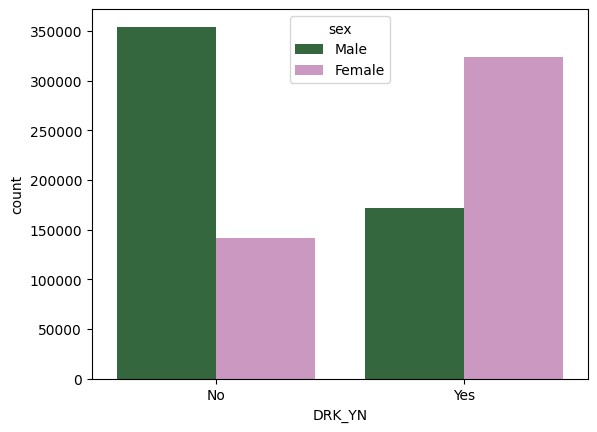

In [17]:
plt.figure()
sns.countplot(x='DRK_YN', hue='sex', data=df, palette='cubehelix')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

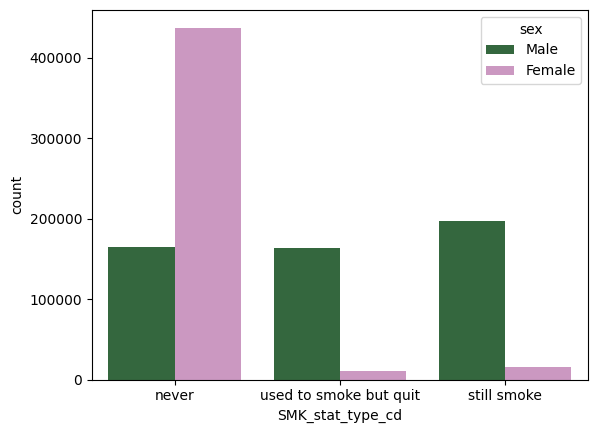

In [18]:
plt.figure()
sns.countplot(x='SMK_stat_type_cd', hue='sex', data=df, palette='cubehelix')
plt.xticks([0, 1, 2], ['never', 'used to smoke but quit', 'still smoke'])
plt.show()

#### Example: Age Distribution 

The graph has such an interesting look since the rounding of the age occurred by 5 years [35, 30, 40, 50, 45, 55, 65, 25, 60, 20, 70, 75, 80, 85]. A clear picture is already visible here:

* People aged 40 to 60 predominate
* The maximum age is 85 years
* Minimum age 20 years

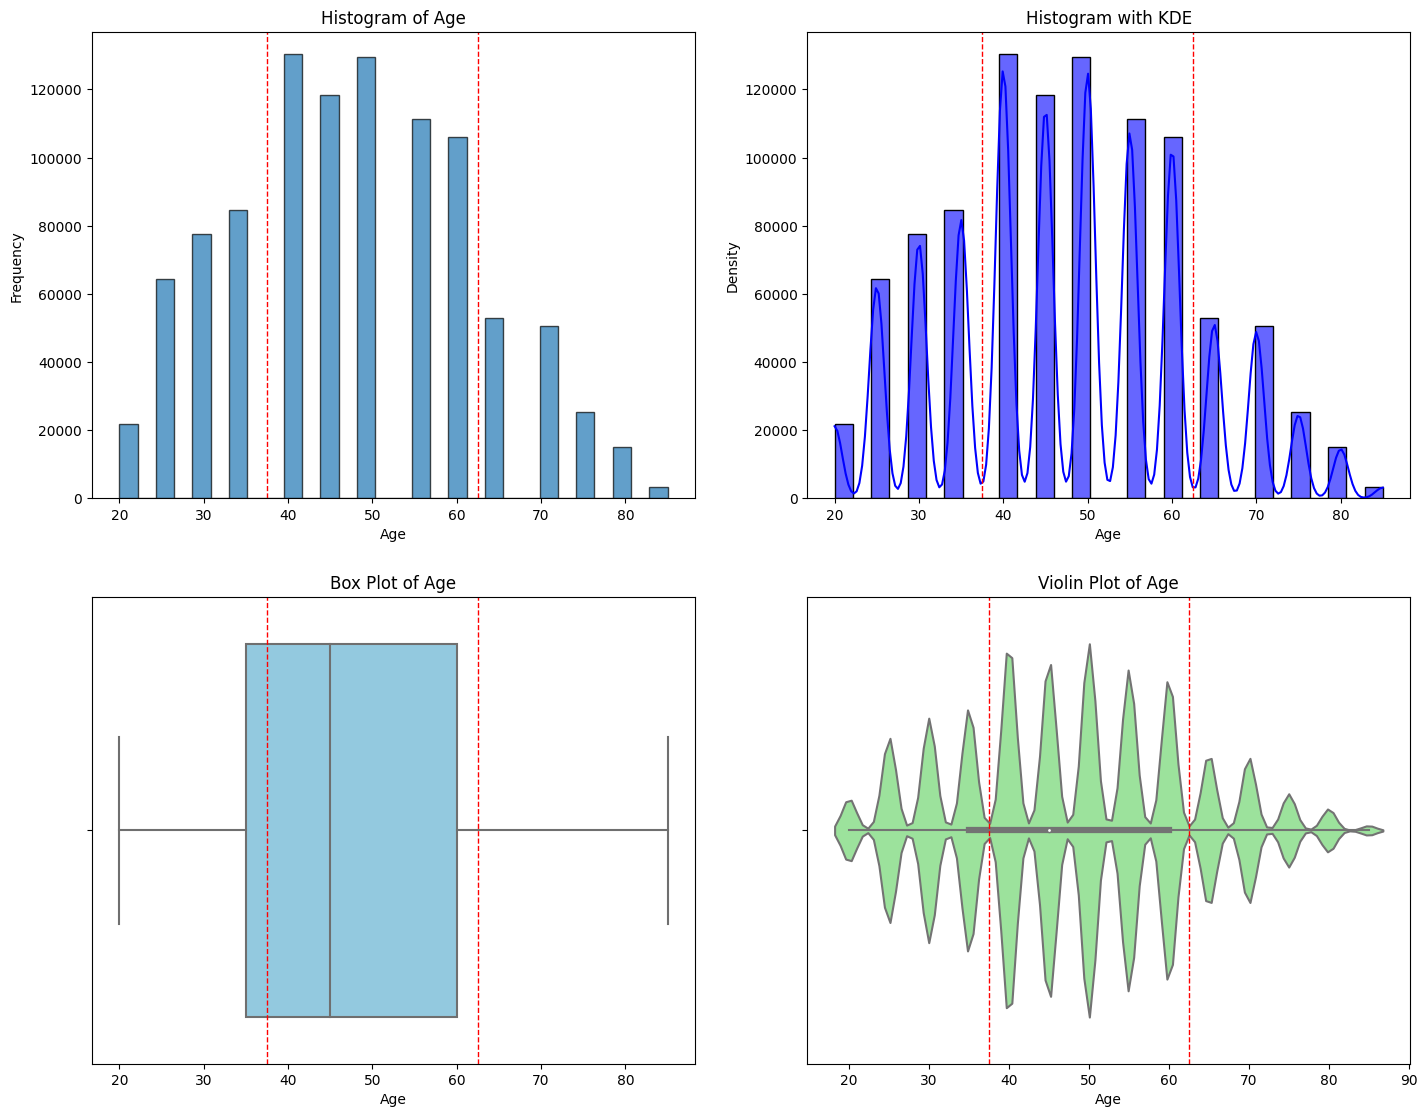

In [19]:
# Set up the size of the plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.tight_layout(pad=5.0)  # Adjust the space between subplots

# Histogram
axes[0, 0].hist(df.age, bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(x=37.5, linewidth=1, color='r', linestyle='--')
axes[0, 0].axvline(x=62.5, linewidth=1, color='r', linestyle='--')
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("Histogram of Age")

# Histogram and KDE Combination
sns.histplot(df.age, bins=30, kde=True, color='blue', alpha=0.6, ax=axes[0, 1])
axes[0, 1].axvline(x=37.5, linewidth=1, color='r', linestyle='--')
axes[0, 1].axvline(x=62.5, linewidth=1, color='r', linestyle='--')
axes[0, 1].set_xlabel("Age")
axes[0, 1].set_ylabel("Density")
axes[0, 1].set_title("Histogram with KDE")

# Box Plot
sns.boxplot(x=df.age, color='skyblue', ax=axes[1, 0])
axes[1, 0].axvline(x=37.5, linewidth=1, color='r', linestyle='--')
axes[1, 0].axvline(x=62.5, linewidth=1, color='r', linestyle='--')
axes[1, 0].set_xlabel("Age")
axes[1, 0].set_title("Box Plot of Age")

# Violin Plot
sns.violinplot(x=df.age, color='lightgreen', ax=axes[1, 1])
axes[1, 1].axvline(x=37.5, linewidth=1, color='r', linestyle='--')
axes[1, 1].axvline(x=62.5, linewidth=1, color='r', linestyle='--')
axes[1, 1].set_xlabel("Age")
axes[1, 1].set_title("Violin Plot of Age")

# Show the plots
plt.show()

This function generates boxplots for all numeric columns in the provided dataframe. It first identifies the numeric columns in the dataframe and then creates a grid of subplots with two columns per row. A boxplot is created for each numeric column, and the plots are labeled with appropriate titles and x-axis labels. Finally, the layout of the plots is adjusted to ensure that everything fits nicely, and the visualizations are displayed on the screen.

In [20]:
def plot_boxplots(dataframe):
    # Select all numeric columns from the dataframe
    num_columns = dataframe.select_dtypes(include=['number']).columns
    
    # Get the number of numeric columns
    num_plots = len(num_columns)
    
    # Calculate the number of rows needed for subplots
    # Each row will contain 2 plots
    rows = (num_plots + 1) // 2
    
    # Create a subplot with the specified number of rows and 2 columns
    # Set the figure size
    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(20, 20))
    
    # Iterate over each numeric column to create a boxplot
    for i, column in enumerate(num_columns):
        # Determine the row and column index for the subplot
        row = i // 2
        col = i % 2
        
        # Select the corresponding subplot axis
        ax = axes[row, col]
        
        # Create a boxplot using Seaborn for the current column
        sns.boxplot(x=dataframe[column], ax=ax)
        
        # Set the title and x-axis label for the current subplot
        ax.set_title(f"Boxplot of {column}")
        ax.set_xlabel(column)
    
    # Adjust the layout to prevent overlap and improve spacing
    plt.tight_layout()
    
    # Display the plots
    plt.show()

### **Visualization with Boxplot for Each Feature**

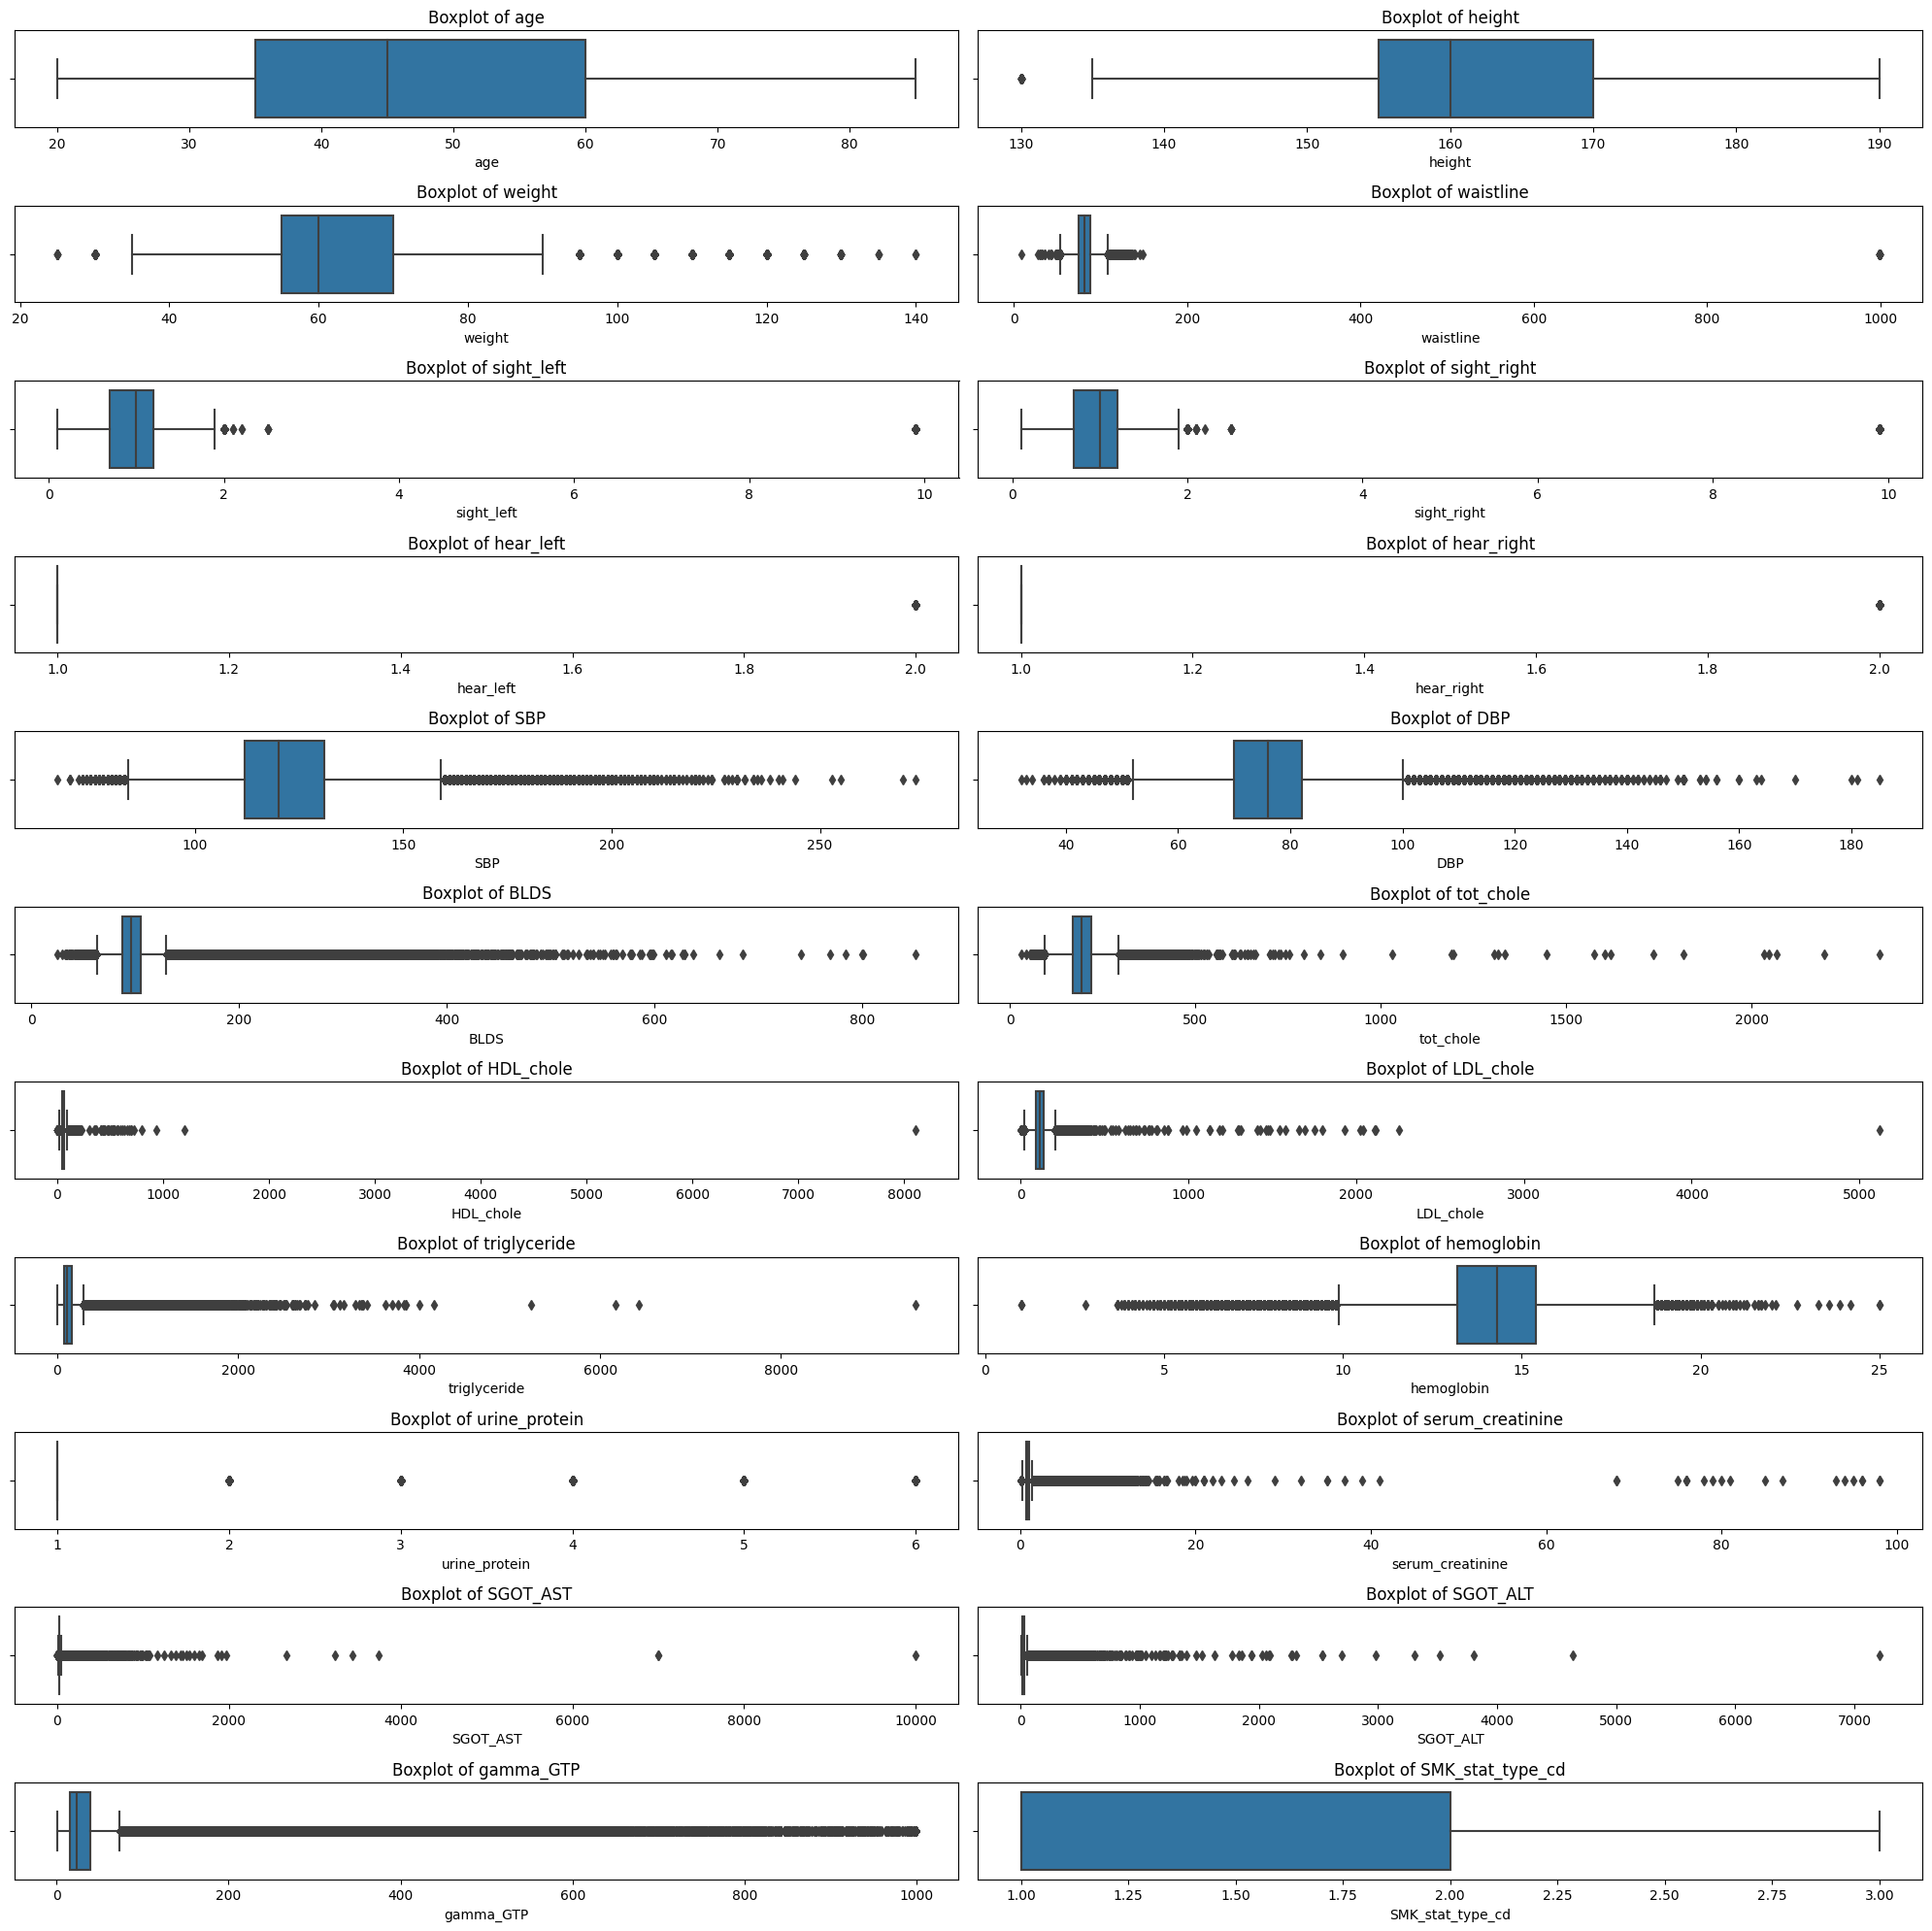

In [21]:
plot_boxplots(df)

# **3. Data Pre-Processing**

### **Remove Outliers**

This function removes outliers from specified columns in the given dataframe. It first calculates the first quartile (Q1) and third quartile (Q3) for each column. The interquartile range (IQR), which is the difference between Q3 and Q1, is then computed. Outliers are defined as values outside the range of [Q1 - k * IQR, Q3 + k * IQR]. The function uses the clip method to replace values outside this range with boundary values. As a result, the dataframe is returned with outliers replaced by boundary values.

In [22]:
def remove_outliers(df, columns, k=1.5):
    """
    A function to remove outliers from the specified dataframe columns.

    Parameters:
    df (pandas.DataFrame): the original dataframe
    columns (list): list of columns to remove outliers for
    k (float): coefficient for calculating range boundaries
    """
    for column in columns:
        # Calculate the first quartile (Q1) which is the 25th percentile
        q1 = df[column].quantile(0.25)
        
        # Calculate the third quartile (Q3) which is the 75th percentile
        q3 = df[column].quantile(0.75)

        # Calculate the interquartile range (IQR), which is the difference between Q3 and Q1
        iqr = q3 - q1

        # Replace values outside the range [Q1 - k * IQR, Q3 + k * IQR] with boundary values
        # 'clip' is used to limit values to within the specified range
        # 'lower': minimum value for clipping. Values below this are replaced by this value.
        # 'upper': maximum value for clipping. Values above this are replaced by this value.
        df[column] = df[column].clip(lower=q1 - k * iqr, upper=q3 + k * iqr)

    return df

In [23]:
# Here I have written columns that have outliers
remove_outliers(df,['waistline','SBP', 'DBP','BLDS','tot_chole','triglyceride','serum_creatinine','SGOT_AST', 'SGOT_ALT'],k=1.5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,41.5,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [24]:
# Control for remove the outliers
df.shape

(991320, 24)

### **Encoding with LabelEncoder**

At this stage, the process of converting categorical variables into numerical values is performed using LabelEncoder from the sklearn.preprocessing module. First, an instance of LabelEncoder is created. The fit_transform method is then applied to the "DRK_YN" column, transforming the categorical labels in this column into numerical format. The same method is applied to the "sex" column to convert its categorical values into numerical values. Finally, the updated dataframe is printed with the encoded values for the "DRK_YN" and "sex" columns to verify the correctness of the transformations. This step is essential for preparing categorical data for machine learning algorithms that require numerical input.

In [25]:
# Create a LabelEncoder instance
le = LabelEncoder()

# Transform the "DRK_YN" column
# 'fit_transform' method encodes the labels into numerical format
df['DRK_YN'] = le.fit_transform(df['DRK_YN'])

# Transform the "sex" column
# 'fit_transform' method encodes the labels into numerical format
df['sex'] = le.fit_transform(df['sex'])

# Print the results to verify the transformation
# This will display the encoded values for "DRK_YN" and "sex" columns
print(df[['DRK_YN', 'sex']])

        DRK_YN  sex
0            1    1
1            0    1
2            0    1
3            0    1
4            0    1
...        ...  ...
991341       0    1
991342       0    1
991343       1    0
991344       0    1
991345       1    1

[991320 rows x 2 columns]


### **Correlation Heatmap for Each Feature**

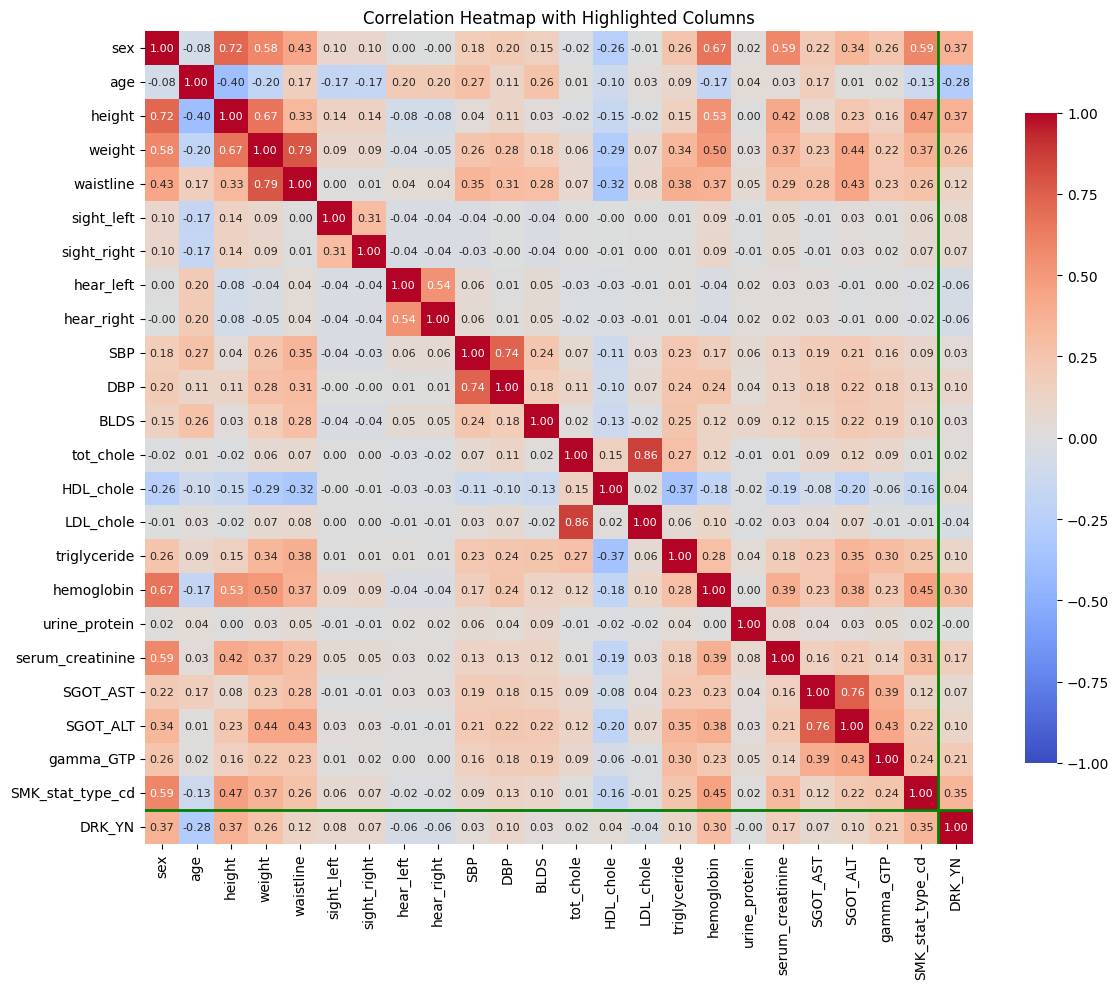

In [26]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Specify columns to highlight
highlight_cols = ['DRK_YN']

# Create a larger heatmap with adjusted font size
plt.figure(figsize=(12, 10))

# Define a custom color palette with vibrant colors
cmap = sns.color_palette("coolwarm", as_cmap=True)  # or use 'viridis', 'plasma', 'magma', 'cividis', etc.

# Plot the heatmap with custom colors for highlighted columns
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, fmt=".2f", annot_kws={"size": 8},
            cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)

# Highlight columns by drawing lines around them
for i in range(len(correlation_matrix.columns)):
    if correlation_matrix.columns[i] in highlight_cols:
        plt.axhline(i, color='green', linewidth=2)
        plt.axvline(i, color='green', linewidth=2)

plt.title('Correlation Heatmap with Highlighted Columns')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# **4- Algorithm Selection & Hyperparameter Optimization**

# ****4.1- Supervised Learning****

Supervised learning is a type of machine learning where the model is trained on labeled data. In this approach, the algorithm learns from input-output pairs, where each input is associated with a known output. The objective is to make predictions or decisions based on new, unseen data by generalizing from the training examples. Supervised learning algorithms are commonly used for classification and regression tasks.

### **1- Linear Regression**

Linear regression is a method used to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data. The model uses the least squares method to minimize the difference between the predicted values and the actual values. This method is widely used for predicting continuous variables and describes the relationship with a linear model.

In [27]:
# 1. Load the data
# (Assuming 'df' is the DataFrame containing the dataset)

# 2. Separate features and target variable
X = df.drop(columns=['DRK_YN'])  
y = df['DRK_YN']  # Target variable

# 3. Split the data into training and testing sets
# 'test_size=0.2' indicates that 20% of the data is used for testing, and 'random_state=42' ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and train the model
model = LinearRegression()  # Initialize the Linear Regression model
model.fit(X_train, y_train)  # Train the model using the training data

LinearRegression()

In [28]:
# 5. Make predictions with the test data
y_pred = model.predict(X_test)  # Predict the target values using the test set

# 6. Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)  # Calculate the Mean Squared Error (MSE) between actual and predicted values
r2 = r2_score(y_test, y_pred)  # Calculate the R-squared score to evaluate the proportion of variance explained by the model

# Print the performance metrics
print(f"Mean Squared Error: {mse}")  # Display the Mean Squared Error
print(f"R-squared: {r2}")  # Display the R-squared score

Mean Squared Error: 0.18444091616562322
R-squared: 0.26222549449336885


Mean Squared Error (MSE): 0.1844

MSE measures how far the model's predictions are from the actual values. The lower the MSE, the closer the model's predictions are to the actual values. A MSE value of 0.1844 indicates that there is some error in the model's predictions, but the magnitude of the error should be assessed in context.

R-squared (R²): 0.2622

R² indicates how much of the variance in the dependent variable is explained by the model. It ranges from 0 to 1; 1 means that the model explains all the variance, while 0 means that the model explains none of the variance. A value of 0.2622 means that the model explains only 26% of the variance in the dependent variable and 74% remains unexplained. This suggests that the model has limited success in predicting the dependent variable and that improvements are needed.

In [29]:
# Apply 5-fold cross-validation
lin_reg_cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # Use 'r2' for regression

# Print the results
print(f"Linear Regression Cross-Validation R² Scores: {lin_reg_cv_scores}")  # Display the R² scores from cross-validation
print(f"Mean R²: {np.mean(lin_reg_cv_scores)}")  # Calculate and print the mean R² across all folds
print(f"Standard Deviation: {np.std(lin_reg_cv_scores)}")  # Calculate and print the standard deviation of R² scores across all folds

Linear Regression Cross-Validation R² Scores: [0.23624411 0.26176767 0.2603879  0.2640818  0.26149479]
Mean R²: 0.2567952557576034
Standard Deviation: 0.010345635330892897


1. Cross-Validation Results
The model's 5-fold cross-validation results are as follows:

Fold 1: 0.2362

Fold 2: 0.2618

Fold 3: 0.2604

Fold 4: 0.2641

Fold 5: 0.2615

2. Mean R² Score

Mean R² score: 0.2568

The mean R² score indicates that the model explains approximately 25.68% of the variance in the dependent variable. This result shows that the model has limited success in explaining the variance of the dependent variable and suggests that improvements are necessary.

3. Standard Deviation

Standard deviation: 0.0103

The standard deviation indicates that the model's performance is quite consistent across the cross-validation folds, with minimal variation in the results. This means that the model performs similarly across different data subsets.

### **2- Logistic Regression**

Logistic regression is used for classification problems where the dependent variable is categorical. It predicts the probability of a binary or multi-class outcome by applying the logistic function (sigmoid function). This method calculates the likelihood of each class and is commonly used to classify data into discrete categories, creating decision boundaries between classes.

In [30]:
# Separate the independent variables (X) and the dependent variable (y)
X = df.drop(columns=['DRK_YN'])  # DRK_YN is the target variable
y = df['DRK_YN']  # Our target variable

# Split the data into training and testing sets (train-test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions with the test data
y_pred = logreg.predict(X_test)

The Logistic Regression model has an accuracy of approximately 72.8% on the test data. This indicates that the model correctly predicted 72.8% of the test samples. This performance may be adequate depending on the application context, but accuracy alone might not be sufficient in cases of class imbalance. It is recommended to evaluate the model's performance using additional metrics and the confusion matrix. To improve performance, different models and hyperparameter settings can be explored.

In [31]:
# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7283520961949723


This confusion matrix shows the performance of the model for a binary classification problem. The model correctly predicted 73,191 instances of Class 0 and 71,215 instances of Class 1. However, it misclassified 26,321 instances of Class 0 as Class 1 and 27,537 instances of Class 1 as Class 0. Overall, while the model demonstrates high accuracy for both classes, there are some misclassifications indicating confusion between the classes. This suggests that further improvements are needed to reduce these errors and enhance the model's ability to distinguish between the classes.

Confusion Matrix:
[[73191 26321]
 [27537 71215]]


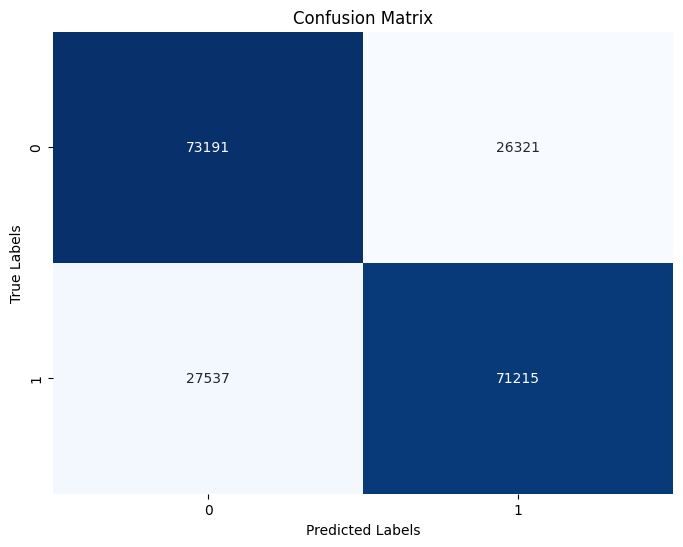

In [32]:
# Perform a more detailed analysis with confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The classification report indicates that the Logistic Regression model performs consistently across both classes, with an overall accuracy of 73%. For both Class 0 and Class 1, the precision, recall, and F1-score are all approximately 0.73, showing balanced performance in terms of true positive rates, false positive rates, and the harmonic mean of precision and recall.

Precision measures the proportion of true positive predictions out of all positive predictions made. Here, both classes have a precision of 0.73, meaning the model is reliable in predicting positive cases for both classes.

Recall measures the proportion of true positive predictions out of all actual positives. With a recall of 0.74 for Class 0 and 0.72 for Class 1, the model performs slightly better in identifying instances of Class 0 compared to Class 1.

F1-Score combines precision and recall into a single metric. An F1-score of 0.73 for both classes indicates a balanced performance between precision and recall.

The macro average and weighted average metrics confirm the overall balance and consistency of the model’s performance across the dataset.

In [33]:
# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73     99512
           1       0.73      0.72      0.73     98752

    accuracy                           0.73    198264
   macro avg       0.73      0.73      0.73    198264
weighted avg       0.73      0.73      0.73    198264



The cross-validation results indicate that the model’s overall performance is consistent, with an average accuracy of around 71.6%. The accuracy scores show minor variability, which suggests that the model performs quite stably across different subsets of the data. The low standard deviation supports this consistency in the model’s performance. Overall, the model demonstrates reliable results with similar performance across various data subsets.

In [34]:
# Apply 5-fold cross-validation
log_reg_cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')

# Print the results
print(f"Logistic Regression Cross-Validation Accuracy Scores: {log_reg_cv_scores}")
print(f"Mean Accuracy: {np.mean(log_reg_cv_scores)}")
print(f"Standard Deviation: {np.std(log_reg_cv_scores)}")

Logistic Regression Cross-Validation Accuracy Scores: [0.71649921 0.71708934 0.71494069 0.7176038  0.71709942]
Mean Accuracy: 0.7166464915466247
Standard Deviation: 0.0009218639127853827


### **3- Decision Trees**

Decision trees are a type of model used for both classification and regression tasks. They split the data into subsets based on the values of input features, creating a tree-like structure where each node represents a decision rule and each leaf represents a predicted outcome. Decision trees are known for their interpretability and ability to handle complex datasets by creating clear decision rules.

In [36]:
# Split the data into training and test sets
X = df.drop(columns=['DRK_YN'])  # DRK_YN is the target variable
y = df['DRK_YN']  # Our target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

The accuracy of the Decision Tree model is calculated to be 64.63%. This result indicates that the model correctly predicted approximately 64.63% of the examples in the test data. This accuracy rate suggests that the model's performance is relatively low and that it made a considerable number of incorrect predictions on the test data. To improve the accuracy, hyperparameter tuning or the use of more complex models may be considered.

In [38]:
# Make predictions with the test data
y_pred = dt_model.predict(X_test)

# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6462948392042933


The model has made 64,033 correct predictions for Class 0 and 35,479 false positive predictions. For Class 1, the model has made 64,104 correct predictions and 34,648 false negative predictions.


True Positives (TP): The model has correctly identified a substantial number of instances for both classes, indicating overall effectiveness in classifying the two classes.

False Positives (FP): The model has made 35,479 false positive predictions for Class 0, where instances of Class 0 were incorrectly classified as Class 1.

False Negatives (FN): The model has made 34,648 false negative predictions for Class 1, where instances of Class 1 were incorrectly classified as Class 0.

Confusion Matrix:
[[64033 35479]
 [34648 64104]]


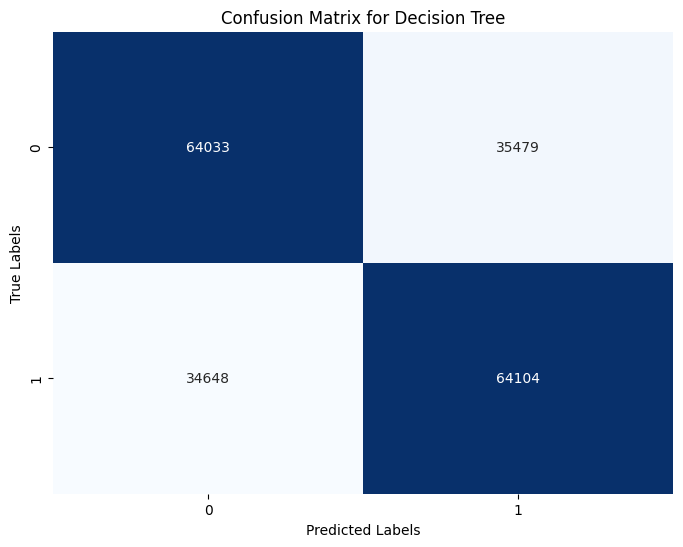

In [39]:
# Perform a more detailed analysis with the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Class 0:

Precision: 0.65 - The model has achieved 65% accuracy in predicting Class 0.

Recall: 0.64 - The model has correctly identified 64% of the actual Class 0 instances.

F1-Score: 0.65 - This is the harmonic mean of Precision and Recall and represents the overall performance.

Class 1:

Precision: 0.64 - The model has achieved 64% accuracy in predicting Class 1.

Recall: 0.65 - The model has correctly identified 65% of the actual Class 1 instances.

F1-Score: 0.65 - This is the harmonic mean of Precision and Recall and represents the overall performance.
Overall:

Accuracy: 0.65 - The overall accuracy of the model is 65%.

Macro Average: The average of Precision, Recall, and F1-Score for each class, with all values being 65%.

Weighted Average: The weighted average of the metrics according to class support, with all values being 65%.

The model's overall performance shows similar results for both classes, with precision, recall, and f1-score values ranging between 64% and 65%. This indicates that the model performs similarly across both classes, achieving an overall accuracy of 65%. The fact that the model performs equally well for both classes suggests that it balances its predictions well and provides consistent performance for both classes. However, further improvements and optimizations may be necessary to enhance the model's performance.

In [40]:
# Generate the classification report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.65     99512
           1       0.64      0.65      0.65     98752

    accuracy                           0.65    198264
   macro avg       0.65      0.65      0.65    198264
weighted avg       0.65      0.65      0.65    198264



The cross-validation results for the Decision Tree model show that the accuracy scores range from 0.6458 to 0.6472. The mean accuracy is calculated to be 64.58%, with a standard deviation of 0.0012. These results indicate that the model demonstrates consistent performance across different folds of the cross-validation and that its accuracy is relatively stable. The low standard deviation suggests that the model performs similarly across various subsets of the data, indicating high reliability. However, since the overall accuracy is around 65%, further improvements, such as hyperparameter tuning or alternative modeling approaches, may be considered to achieve better results.

In [41]:
# Apply 5-fold cross-validation
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')

# Print the results
print(f"Decision Tree Cross-Validation Accuracy Scores: {dt_cv_scores}")
print(f"Mean Accuracy: {np.mean(dt_cv_scores)}")
print(f"Standard Deviation: {np.std(dt_cv_scores)}")

Decision Tree Cross-Validation Accuracy Scores: [0.6457602  0.64588125 0.64356615 0.64665295 0.64718759]
Mean Accuracy: 0.645809627567284
Standard Deviation: 0.001236989078451077


### **4- k-Nearest Neighbors (KNN) Classifier**

The k-Nearest Neighbors (KNN) algorithm is used for classification and regression tasks. It classifies a new data point based on the majority class of its k-nearest neighbors in the feature space. KNN is a simple and effective method that works well with small to medium-sized datasets, but it can be computationally expensive with large datasets.

In [42]:
# Prepare the data
X = df.drop(columns=['DRK_YN'])  # Exclude the target variable
y = df['DRK_YN']  # Our target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the KNN model (let's choose k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model with the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

The accuracy of the KNN model on the test data is 69.21%. This indicates that the model correctly predicted approximately 69% of the test data. The accuracy provides insight into the model's overall performance. Higher accuracy rates can be aimed for, and techniques such as hyperparameter tuning or other improvements can be considered to enhance the model's performance.

In [43]:
# Make predictions with the test data
y_pred = knn_model.predict(X_test)

# Calculate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy}")

KNN Model Accuracy: 0.6921276681596256


True Negatives (TN): 67,591 — The number of negative class instances correctly predicted by the model.

False Positives (FP): 31,921 — The number of negative class instances incorrectly predicted as positive by the model.

False Negatives (FN): 29,119 — The number of positive class instances incorrectly predicted as negative by the model.

True Positives (TP): 69,633 — The number of positive class instances correctly predicted by the model.

These results give insights into how the model predicts positive and negative classes and what types of errors it makes. Specifically, the false positive and false negative rates are useful for understanding where the model performs well or poorly.

Confusion Matrix:
[[67591 31921]
 [29119 69633]]


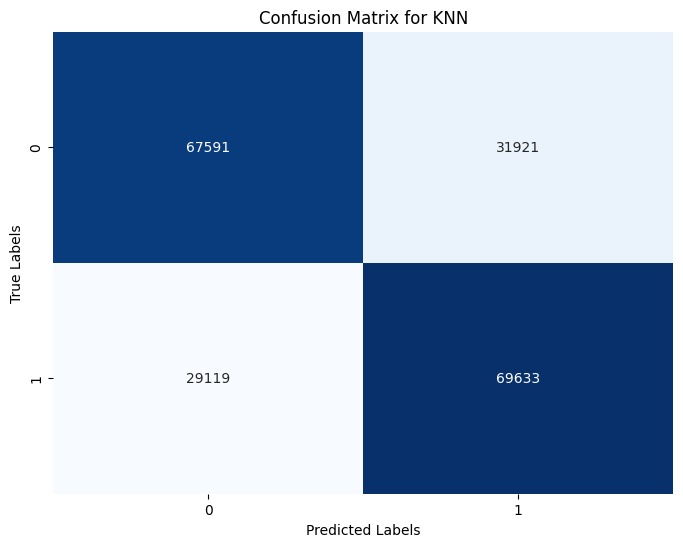

In [44]:
# Perform a detailed analysis with confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Class 0 (Negative Class):

Precision: 0.70 (70%) — 70% of the positive predictions made by the model for class 0 are correct. This indicates that the model has a good accuracy in identifying class 0.

Recall: 0.68 (68%) — 68% of the actual instances of class 0 were correctly predicted. The model's ability to detect class 0 is somewhat lower.

F1-Score: 0.69 (69%) — As the harmonic mean of precision and recall, the F1 score for class 0 shows balanced performance. This suggests that the model maintains a good balance between accuracy and coverage for class 0.

Class 1 (Positive Class):

Precision: 0.69 (69%) — 69% of the positive predictions made by the model for class 1 are correct. This means the model’s accuracy in identifying class 1 is good but slightly lower than for class 0.

Recall: 0.71 (71%) — 71% of the actual instances of class 1 were correctly predicted. The model's ability to detect class 1 is slightly better than for class 0.

F1-Score: 0.70 (70%) — As the harmonic mean of precision and recall, the F1 score for class 1 indicates a somewhat better performance. This reflects that the model shows balanced performance in terms of both accuracy and coverage for class 1.

Accuracy: 0.69 (69%) — The overall accuracy of the model across all data. This means the model made correct predictions 69% of the time for all classes.

Macro Average: 0.69 (69%) — The average of precision, recall, and F1-score for each class, treating all classes equally. This provides an overall assessment of model performance considering all classes equally.

Weighted Average: 0.69 (69%) — The average of precision, recall, and F1-score for each class, weighted by the number of instances in each class. This evaluates the model’s performance taking into account class imbalance.

In [45]:
# Generate the classification report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69     99512
           1       0.69      0.71      0.70     98752

    accuracy                           0.69    198264
   macro avg       0.69      0.69      0.69    198264
weighted avg       0.69      0.69      0.69    198264



According to the 5-fold cross-validation results for the KNN model, the accuracy scores obtained in each fold range from 0.6716 to 0.6742. These values indicate that the model demonstrates a consistent performance overall and that the accuracy rates are quite similar across different folds. The mean accuracy score is 0.6729, meaning the model's overall performance on the test data is 67.29%. The standard deviation value of 0.0009 indicates that there is very little variation in the model’s accuracy scores, reflecting that the model yields similar results across different folds.

In [46]:
# Apply 5-fold cross-validation
knn_cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')

# Print the results
print(f"KNN Cross-Validation Accuracy Scores: {knn_cv_scores}")
print(f"Mean Accuracy: {np.mean(knn_cv_scores)}")
print(f"Standard Deviation: {np.std(knn_cv_scores)}")

KNN Cross-Validation Accuracy Scores: [0.67345559 0.672235   0.67289573 0.6716247  0.67418694]
Mean Accuracy: 0.6728795948835895
Standard Deviation: 0.0008979367764107933


### **Evaluation of Four Supervised Learning Models**



Four different supervised algorithms were trained and evaluated. The Logistic Regression model demonstrated the best performance with an accuracy rate of 72.8%. Precision, Recall, and F1-Score metrics showed balanced and consistent results. Additionally, cross-validation results indicated that the model is generally stable.

While KNN provided relatively balanced outcomes, it was not as successful as Logistic Regression. Linear Regression and Decision Tree were not recommended due to their low R² and accuracy scores.

Logistic Regression emerges as the best option, with potential for further improvements in reducing class imbalances and increasing overall accuracy.

# ****4.2- Unsupervised Learning****

Unsupervised Learning is a type of machine learning where the algorithm learns patterns from unlabeled data, meaning there is no explicit output variable provided. Unlike supervised learning, where the goal is to map inputs to known outputs (i.e., classification or regression tasks), unsupervised learning focuses on uncovering the hidden structure, patterns, or relationships within the data.

Key characteristics of unsupervised learning include:

No Labels: The dataset consists of input variables (features) without corresponding output labels, meaning the model does not know the correct answers.

Pattern Discovery: The algorithm tries to find intrinsic patterns in the data, such as grouping similar instances (clustering) or detecting anomalies.

Dimensionality Reduction: It can also reduce the number of variables while retaining the essential information, making it easier to visualize or analyze the data.

Common applications of unsupervised learning include:

Clustering: Grouping similar data points into clusters, as seen in algorithms like k-Means, DBSCAN, and Hierarchical Clustering.
Anomaly Detection: Identifying outliers or abnormal data points that deviate from the majority.

Dimensionality Reduction: Techniques like Principal Component Analysis (PCA) help in reducing the feature space for visualization or preprocessing.

Unsupervised learning is particularly useful in exploratory data analysis, allowing us to discover insights without predefined labels or outputs.

### **Create the Elbow Plot**

At this stage, the number of clusters has been determined to be two based on the elbow plot.

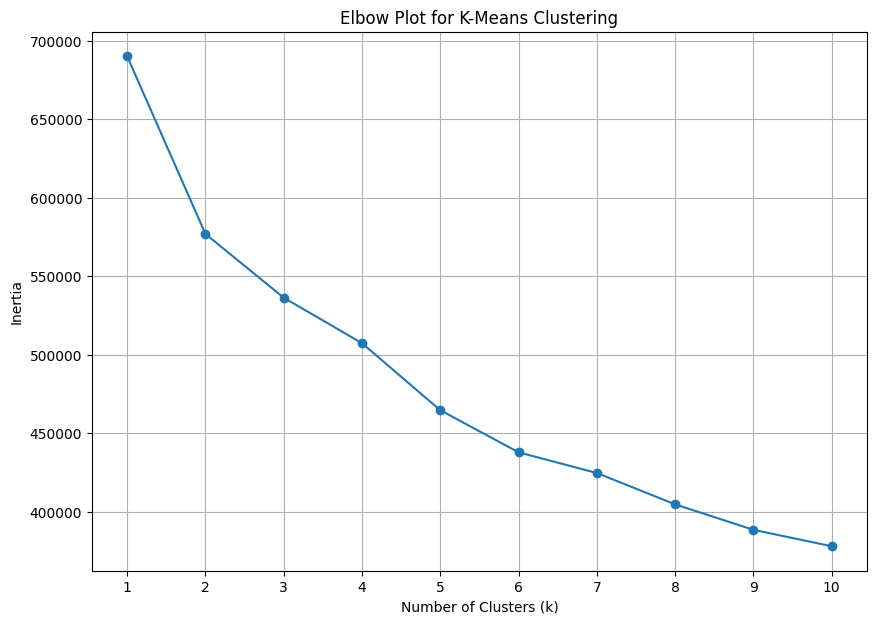

In [46]:
# Remove the target variable and normalize the features
X = df.drop(columns=['DRK_YN'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the variances for the Elbow Plot
inertia = []
k_values = range(1, 11)  # Use k values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Create the Elbow Plot
plt.figure(figsize=(10, 7))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### **Model Evaluation Metrics for Unsupervised Methods**

Silhouette Score: This metric measures the clustering performance, with values ranging from -1 to 1. A high Silhouette score (close to 1) indicates good separation between clusters and that data points within each cluster are tightly grouped. Negative or near-zero values suggest poor clustering performance.

Davies-Bouldin Index: This metric evaluates the similarity between clusters. A lower Davies-Bouldin Index indicates better clustering, reflecting greater differences between clusters and tighter grouping of data points within each cluster.

Log-Likelihood: This metric indicates how well the model fits the data. A higher log-likelihood value means the model fits the observed data better. It is commonly used in probabilistic models such as Gaussian Mixture Models (GMM).

Calinski-Harabasz Index: This metric assesses the separation between clusters and compactness within clusters. A higher score indicates better clustering quality, where the difference between clusters is more pronounced.

Inertia: In K-means clustering, inertia represents the sum of squared distances of each data point to its assigned cluster center. A lower inertia value indicates tighter clusters, meaning the data points are well-represented by the clusters.

AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion): These metrics evaluate model fit and complexity. Lower AIC and BIC values suggest that the model fits the data better and is simpler. AIC focuses more on model fit, while BIC penalizes model complexity more strictly, providing a more conservative evaluation.

### **1. k-Means Clustering**

k-Means is a partition-based clustering algorithm that groups data into a predefined number of clusters (k). The algorithm works by initializing k centroids, then iteratively assigning each data point to the nearest centroid and updating the centroids based on the average position of the points in each cluster. The process continues until the centroids no longer change significantly, minimizing the variance within clusters. k-Means is efficient and widely used, though it assumes spherical cluster shapes and requires selecting the number of clusters beforehand.

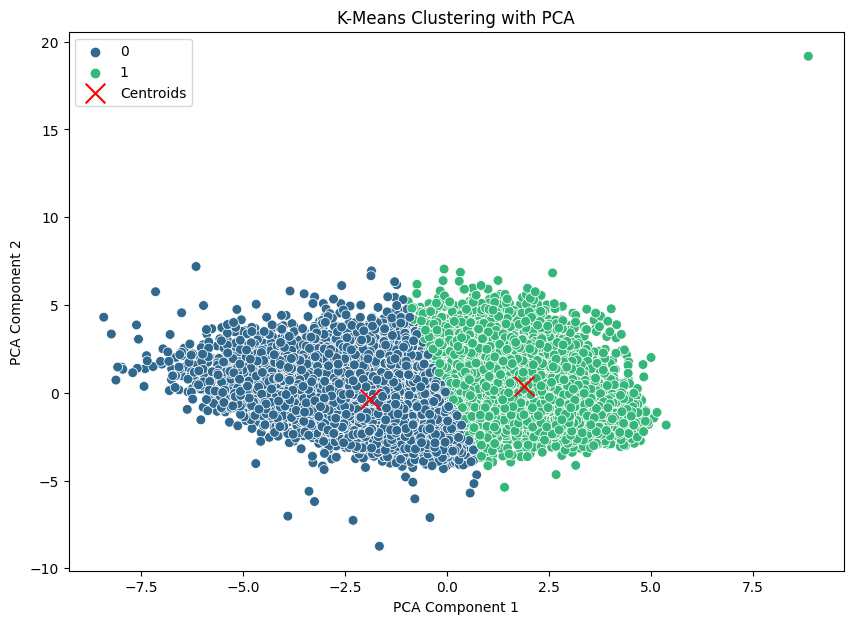

In [80]:
# Remove the target variable and normalize the features
X = df.drop(columns=['DRK_YN'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

# Create and train the K-Means model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', marker='o', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

The metrics obtained for the K-means model indicate that the separation between clusters is at a reasonable level. A Silhouette score of 0.4479 suggests moderate separation, while a Davies-Bouldin Index of 0.8813 reflects low similarity between clusters, indicating a good clustering result. The Calinski-Harabasz score of 29642.3031, a high value, emphasizes the clear distinction between clusters. The Inertia value (112872.0338) shows that the clusters are tightly packed, but this value should be compared with other K-means runs to better understand model performance.

In [81]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_pca, labels)
print("Silhouette Score:", silhouette_avg)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_pca, labels)
print(f'Davies-Bouldin Index: {db_index:.4f}')

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_pca, labels)
print(f'Calinski-Harabasz Score: {ch_score:.4f}')

# Inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print(f'Inertia: {inertia:.4f}')

Silhouette Score: 0.4479086036340193
Davies-Bouldin Index: 0.8813
Calinski-Harabasz Score: 29642.3031
Inertia: 112872.0338


### **2. Hierarchical Clustering**

Hierarchical clustering creates a hierarchy of clusters in a tree-like structure (dendrogram). The agglomerative method starts by treating each data point as its own cluster, then iteratively merging the closest clusters based on a chosen linkage criterion (e.g., Ward’s, single, complete). The process continues until all points belong to a single cluster. The final dendrogram helps visualize cluster relationships, and the user can decide how many clusters to form by cutting the dendrogram at a specific level. Unlike k-Means, hierarchical clustering does not require specifying the number of clusters beforehand.

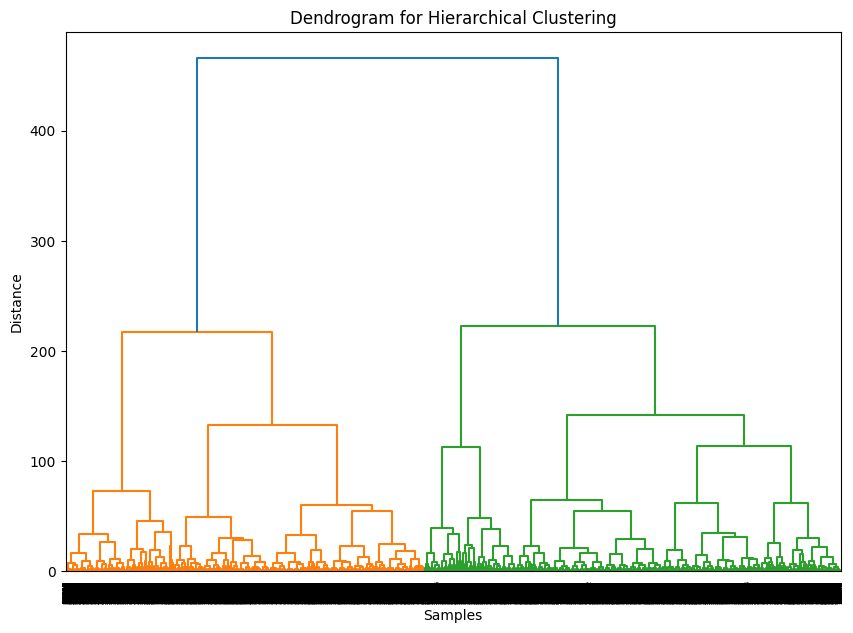

In [82]:
# Remove the target variable and normalize the features
X = df.drop(columns=['DRK_YN'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

# Create and train the Hierarchical clustering model
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(X_pca)

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

The evaluation metrics for hierarchical clustering indicate a moderate clustering performance. The Silhouette Score of 0.4391 reflects reasonable separation between clusters, though not optimal. The Davies-Bouldin Index of 0.8956 suggests that the clusters are well-separated with low similarity between them, indicating good clustering quality. The high Calinski-Harabasz Score of 28176.4757 further supports this, showing a significant distinction between clusters. The Inertia value of 112872.0338, while typically used in K-means clustering, suggests that clusters may not be tightly packed in this context. Overall, these results demonstrate that hierarchical clustering provides a satisfactory level of cluster separation and data grouping.

In [83]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_pca, labels)
print("Silhouette Score:", silhouette_avg)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_pca, labels)
print(f'Davies-Bouldin Index: {db_index:.4f}')

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_pca, labels)
print(f'Calinski-Harabasz Score: {ch_score:.4f}')

# Inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print(f'Inertia: {inertia:.4f}')

Silhouette Score: 0.4391042849165824
Davies-Bouldin Index: 0.8956
Calinski-Harabasz Score: 28176.4757
Inertia: 112872.0338


### **3. Density-Based Spatial Clustering of Applications with Noise(DBSCAN)**

DBSCAN is a density-based clustering algorithm that groups data points into clusters based on their density. The algorithm identifies regions of high point density (clusters) and separates them from regions of low density (noise or outliers). It defines clusters as areas where at least a minimum number of points exist within a defined distance (epsilon). DBSCAN is advantageous for discovering clusters of arbitrary shapes and handling noise, but its performance is sensitive to the choice of the epsilon and minimum points parameters.

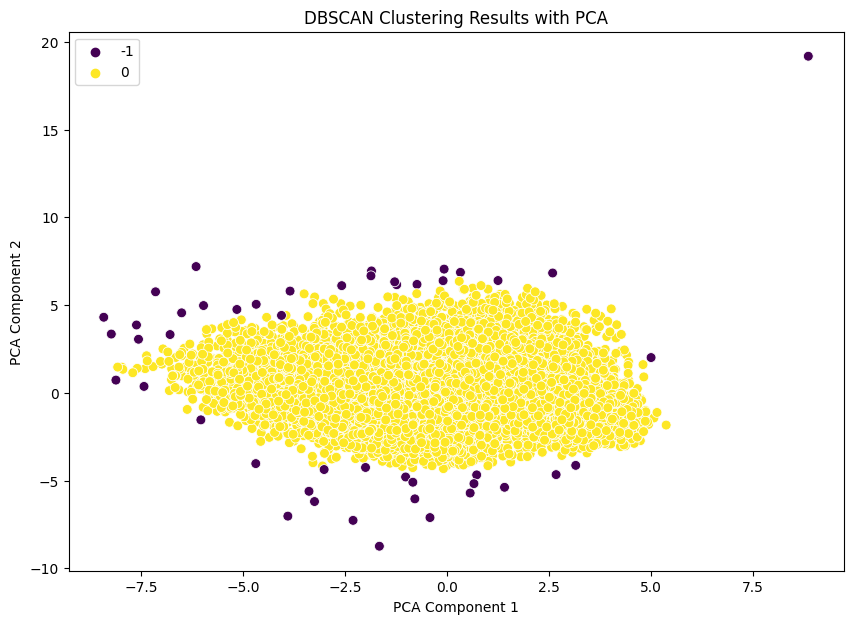

In [84]:
# Remove the target variable and normalize the features
X = df.drop(columns=['DRK_YN'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

# Create and train the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_pca)

# Visualize the results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', marker='o', s=50)
plt.title('DBSCAN Clustering Results with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

The evaluation results for the DBSCAN algorithm indicate a mixed performance in clustering. The Silhouette Score of 0.5382 suggests that the separation between clusters is quite good, with data points being reasonably well-grouped within their clusters. However, the Davies-Bouldin Index of 3.4084 indicates high similarity between clusters and a lack of distinct separation. The Calinski-Harabasz Score of 44.7042 is quite low, highlighting weak differentiation between clusters and poor clustering quality. The Inertia metric, typically used with K-means, may not be directly applicable to DBSCAN. Overall, these results suggest that DBSCAN struggled to create a clear and effective clustering structure within the dataset.

In [85]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_pca, labels)
print("Silhouette Score:", silhouette_avg)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_pca, labels)
print(f'Davies-Bouldin Index: {db_index:.4f}')

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_pca, labels)
print(f'Calinski-Harabasz Score: {ch_score:.4f}')

# Inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print(f'Inertia: {inertia:.4f}')

Silhouette Score: 0.5381649821730615
Davies-Bouldin Index: 3.4084
Calinski-Harabasz Score: 44.7042
Inertia: 112872.0338


### **4. Gaussian Mixture Models(GMM)**

GMM is a probabilistic model that represents data as a mixture of multiple Gaussian distributions, each with its own mean and variance. Unlike k-Means, which assigns each point to exactly one cluster, GMM estimates the probability that a data point belongs to each cluster. The algorithm uses Expectation-Maximization (EM) to iteratively refine the parameters of the Gaussians and maximize the likelihood of the data. GMM is more flexible than k-Means, as it allows for clusters of different shapes and sizes, though it may require more computational effort.

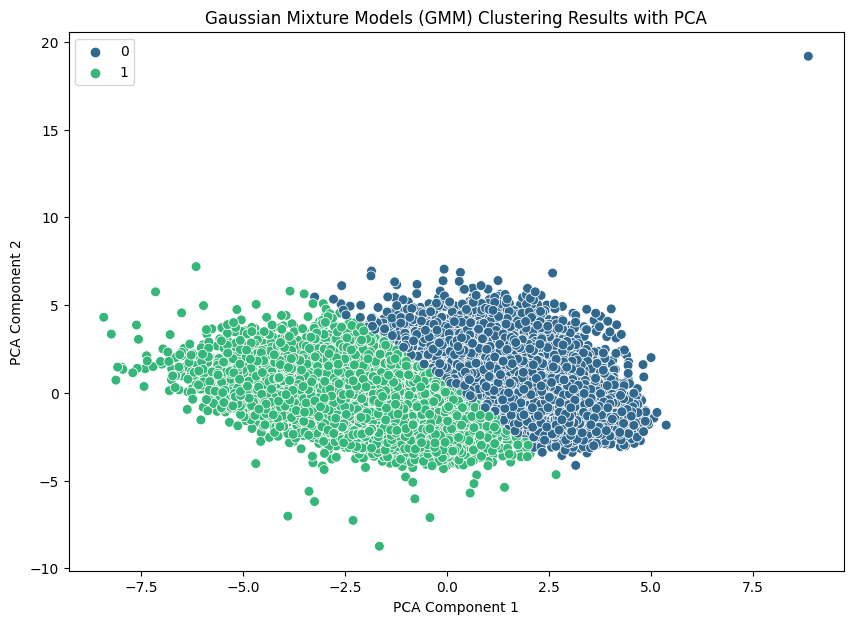

In [86]:
# Remove the target variable and normalize the features
X = df.drop(columns=['DRK_YN'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

# Create and train the GMM model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_pca)

# Get cluster labels
labels = gmm.predict(X_pca)

# Visualize the results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', marker='o', s=50)
plt.title('Gaussian Mixture Models (GMM) Clustering Results with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


The evaluation results for the Gaussian Mixture Model (GMM) reveal a mixed clustering performance. The Silhouette Score of 0.4432 indicates moderate separation between clusters, suggesting that data points are reasonably well-grouped within their clusters. The Davies-Bouldin Index of 0.8974 supports this, showing good cluster separation with low similarity between clusters. However, the Log-Likelihood of -3.9606 suggests that the model's fit to the data is limited, as higher values are preferable. The Calinski-Harabasz Score of 28225.5720 indicates strong cluster separation, reflecting successful clustering quality. The Inertia value of 112872.0338, typically used for K-means, is less relevant here but implies that clusters may not be tightly packed. The AIC and BIC values of 237657.4907 and 237748.8892, respectively, indicate that the model may be complex and not perfectly fitting the data. Overall, these results suggest that while the GMM provides reasonable clustering, there are areas where the model's fit and complexity could be improved.

In [89]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_pca, labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_pca, labels)
print(f'Davies-Bouldin Index: {db_index:.4f}')

# Log-Likelihood
log_likelihood = gmm.score(X_pca)
print(f'Log-Likelihood: {log_likelihood:.4f}')

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_pca, labels)
print(f'Calinski-Harabasz Score: {ch_score:.4f}')

# Inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print(f'Inertia: {inertia:.4f}')

# AIC and BIC
aic = gmm.aic(X_pca)
bic = gmm.bic(X_pca)
print(f'AIC: {aic:.4f}')
print(f'BIC: {bic:.4f}')

Silhouette Score: 0.4432
Davies-Bouldin Index: 0.8974
Log-Likelihood: -3.9606
Calinski-Harabasz Score: 28225.5720
Inertia: 112872.0338
AIC: 237657.4907
BIC: 237748.8892


### **Evaluation of Four Unsupervised Learning Models**

Among the unsupervised methods evaluated, K-means emerges as the strongest performer, demonstrating the best overall clustering results. With a Silhouette Score of 0.4479 and a Davies-Bouldin Index of 0.8813, it shows good cluster separation and low similarity between clusters, suggesting effective grouping. The high Calinski-Harabasz Score of 29642.3031 further underscores the clear distinction between clusters. Hierarchical clustering also shows solid performance but is slightly less effective than K-means. In contrast, DBSCAN struggles with cluster differentiation and quality, as indicated by its low Calinski-Harabasz Score and high Davies-Bouldin Index. Gaussian Mixture Model (GMM), while providing reasonable clustering, is hindered by limited fit and complexity issues. Overall, K-means stands out as the most effective method for this dataset, delivering the best balance of cluster separation and quality.

## **Evaluation for Supervised and Unsupervised Models**

Logistic Regression was chosen as the better option for binary classification problems because it offers a high accuracy rate (72.8%) and balanced performance metrics (Precision, Recall, F1-Score), demonstrating its ability to effectively separate both classes. Cross-validation results further indicate that the model is generally stable and provides consistent results across different data subsets. Additionally, the probability predictions provided by Logistic Regression make interpreting the results easier. In contrast, unsupervised methods (K-means, DBSCAN, GMM) are not suitable for this type of classification problem as they perform clustering analyses and do not directly provide classification results. These methods are effective at grouping data points into clusters but do not offer effective performance in predicting target variables (such as alcohol consumption status). Therefore, Logistic Regression is selected as the most effective solution for binary classification tasks like predicting alcohol consumption.